# **Import Libraries and modules**

Install Keras Library, just to ensure latest version of Keras is installed.
Post installation, import the library

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

Import all required libraries, so that functions from the libraries are available.

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Download/Load MNIST data with mnist.load_data(), and assign Training and Test data to X_train, X_test. And also assign Train andTest labels to y_train and y_train.

(60000, 28, 28)


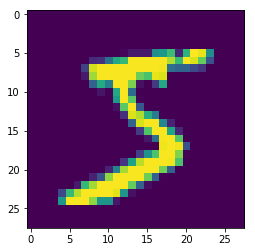

In [49]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

Shape of X_train is printed to get insight on how many images and of what resolution. There are 60,000 images of 28x28 size. With matplot, first image is plotted.

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

Depth of the image should be explictly mentioned for keras, being grayscale image, of 28x28, 28, 28, 1 is mentioned and also 4th dimension as samples count (''[0]''), i.e. 60000 is mentioned. Line X_train_reshape defined that; adds a dimension for sample count, x, y size and depth as 1. Same is repeated for test data.

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Data type is converted to float to accomdate decimals post normalization. Data is normalized by dividing by 255.

In [52]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

Display last 10 rows of Labels from training data

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

Here labels of training and test data are converted from integer 0-9 to categorical format 0-9. This is ensure that the labels are of categorical type than integer. Labels of both train and test are converted.

In [54]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

Post conversion, labels on last 10 rows are printed. Now it displays as categorical data.

In [0]:
from keras.layers import Activation
from keras.layers.normalization import BatchNormalization

model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))   #26x26x32
model.add(BatchNormalization())                                                #Batch normaliztion
model.add(Convolution2D(16, 3,3, activation='relu'))                           #24x24x32
model.add(BatchNormalization())                                                #Batch normaliztion
model.add(Convolution2D(16, 3,3, activation='relu'))                           #22x22x16
model.add(Dropout(0.25))                                                        #Dropout


model.add(Convolution2D(16, 3,3, activation='relu'))                           #20x20x16
model.add(BatchNormalization())                                                #Batch normaliztion
model.add(Convolution2D(16, 3,3, activation='relu'))                           #18x18x16
model.add(BatchNormalization())                                                #Batch normaliztion
model.add(Dropout(0.25))                                                        #Dropout

model.add(MaxPooling2D(pool_size=(2, 2)))                                      #9x9x16  - Maxpooling 2x2

model.add(Convolution2D(10, 3,3, activation='relu'))                           #7x7x10
model.add(Convolution2D(10, 7))                                                #7x7x10 - 1x1x10
model.add(BatchNormalization())                                                #Batch normaliztion
model.add(Dropout(0.25))                                                        #Dropout

model.add(Flatten())                                                           #Flaten into 10x1
model.add(Activation('softmax'))                                               #Softmax


      

Sequential model is instantiated, as "model".   
 Model consists of multiple Conv2D+Batch Normalisation+Dropout layers. 
 
First group of layers are of 3x3x32 Conv2D for a input of 28x28x1. This is followed with Batch Normalisation + 3x3x16 Conv2D + Batch Normalization layer + 3x3x16 Conv2D + Dropout, outputing 22x22x16 image.  

Second group of layers consists of 3x3x16 Conv2D + Batch Normalization + 3x3x16 Conv2D + Batch Normalization + Dropout  

Third group is of 2x2x16 Maxpool + 3x3x10 Conv2D + 1x1x10 Conv2D + Batch Normalization + Droupout

A flatten and Softmax activation concludes the model. Except go for softmax activation remaining activation with 3x3 Conv2D are with relu.

In [55]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_50 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_34 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 24, 24, 16)        4624      
_________________________________________________________________
batch_normalization_35 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 22, 22, 16)        2320      
_________________________________________________________________
dropout_20 (Dropout)         (None, 22, 22, 16)        0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 20, 20, 16)        2320      
__________

Model summary lists out the difference layer details and trainable parameters of 18K.

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

Categorical crossentropy was used for loss, adam as optimizer and accuracy as tracking metric.

In [60]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=50, verbose=1, validation_data=(X_test, Y_test))
#model.fit_generator(datagen.flow(X_train, Y_train, batch_size=32), steps_per_epoch=len(X_train)/32, nb_epoch=60, verbose=1)


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
  480/60000 [..............................] - ETA: 21s - loss: 0.3872 - acc: 0.8042

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 18s 298us/step - loss: 0.4088 - acc: 0.7906 - val_loss: 0.0246 - val_acc: 0.9929
Epoch 2/50
60000/60000 [==============================] - 18s 295us/step - loss: 0.4077 - acc: 0.7937 - val_loss: 0.0237 - val_acc: 0.9936
Epoch 3/50
60000/60000 [==============================] - 18s 297us/step - loss: 0.4059 - acc: 0.7925 - val_loss: 0.0228 - val_acc: 0.9926
Epoch 4/50
60000/60000 [==============================] - 19s 317us/step - loss: 0.4117 - acc: 0.7912 - val_loss: 0.0226 - val_acc: 0.9929
Epoch 5/50
60000/60000 [==============================] - 19s 313us/step - loss: 0.4158 - acc: 0.7870 - val_loss: 0.0223 - val_acc: 0.9938
Epoch 6/50
60000/60000 [==============================] - 18s 308us/step - loss: 0.4108 - acc: 0.7900 - val_loss: 0.0236 - val_acc: 0.9932
Epoch 7/50
60000/60000 [==============================] - 18s 296us/step - loss: 0.4108 - acc: 0.7911 - val_loss: 0.0228 - val_acc: 0.9936
Epoch 8/50
60000/60000 [==============

Image augumentation did not improve accuracy much. Hence was discarded.  
Model is run on X_train with 60 epochs, 32 images in a batch, along with validation on X_test

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

Model is evaluated on X_test data again.

In [62]:
print(score)

[0.022248819211730733, 0.9934]


Accuracy score is printed. 99.32% is achieved, one of epoch achieved 99.4% though.

In [0]:
y_pred = model.predict(X_test)

model is predicted on X_test data and assigned to y_pred

In [64]:
print(y_pred[:9])
print(y_test[:9])

[[1.6129716e-06 1.3426575e-05 2.7557805e-06 6.3281273e-06 6.7069232e-06
  9.8587925e-06 2.7276806e-06 9.9991846e-01 3.5047284e-05 3.0790311e-06]
 [1.0271739e-05 3.9734887e-06 9.9978572e-01 8.7304652e-06 1.9308192e-05
  1.9095428e-10 3.0665717e-05 2.5754603e-05 9.7181237e-06 1.0589994e-04]
 [1.9586560e-05 9.9972039e-01 7.2752391e-06 1.5777043e-05 2.8043769e-05
  8.8689150e-05 3.6335091e-06 2.3646524e-05 5.3262105e-05 3.9782513e-05]
 [9.9993837e-01 1.4601968e-05 9.4847019e-07 1.0436790e-05 1.8226830e-06
  2.8795321e-06 2.8878510e-06 1.6658796e-06 9.8744968e-06 1.6504089e-05]
 [3.6697860e-09 1.2719090e-04 3.4597768e-05 1.5273738e-10 9.9810350e-01
  1.1808290e-03 5.9710632e-09 6.2121580e-05 7.1371233e-09 4.9171876e-04]
 [3.0051131e-05 9.9947923e-01 1.6694770e-05 1.0465269e-05 8.9361296e-05
  5.9624163e-05 7.0066981e-06 1.1837997e-04 9.1109287e-05 9.8066630e-05]
 [8.3227597e-08 6.0682098e-04 2.4201772e-04 3.4334789e-08 9.9714154e-01
  1.2770678e-03 1.9471955e-07 3.2686154e-04 1.9688762e-04 

last 9 values of prediction is printed.

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

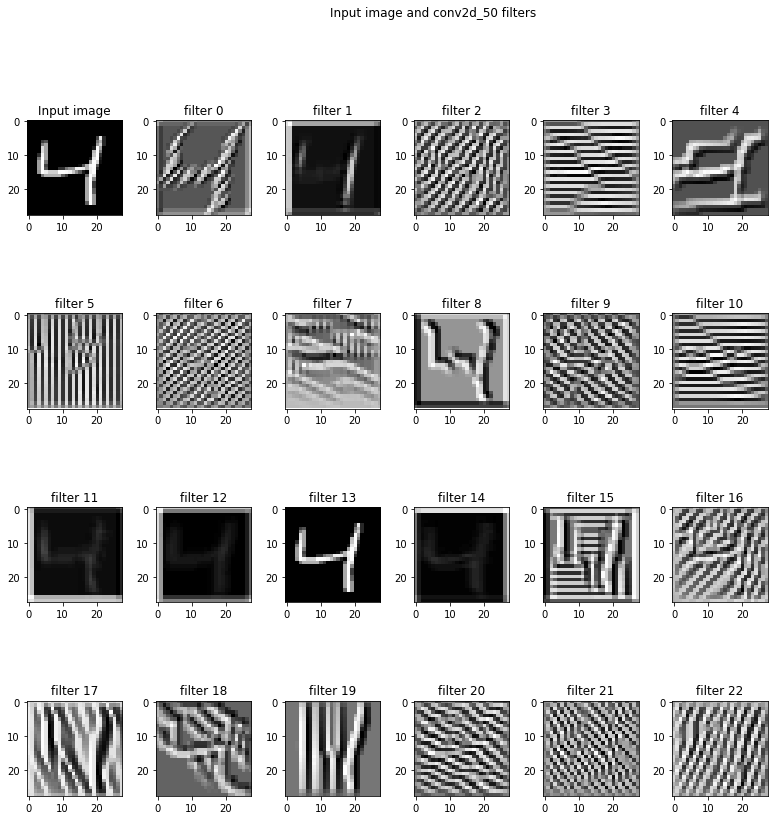

In [66]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_50'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

Above code captures the kernel extract of various layers and plots them.